# Import Dataset

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
csv_url = ('https://raw.githubusercontent.com/sumeyyeozel/csv/main/startup%20data.csv')
df = pd.read_csv(csv_url)
df.shape

(923, 49)

In [27]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


# explorative Datenanalyse

In [28]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [30]:
df.isnull().sum().sort_values(ascending=False).head(10)

closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
zip_code                      0
age_first_funding_year        0
milestones                    0
funding_total_usd             0
funding_rounds                0
dtype: int64

In [31]:
df.duplicated().sum() 

0

Es gibt keine doppelten Daten. Wenn wir jedoch die doppelten Daten mit dem Subset-Namen überprüfen, erscheinen 1 doppelte Daten. wir werden es löschen

In [32]:
df.duplicated(subset=['name']).sum()

1

In [33]:
df=df.drop_duplicates(subset=['name'])

In [34]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value

,index,0
0,Unnamed: 0,0
1,state_code,0
2,latitude,0
3,longitude,0
4,zip_code,0
5,id,0
6,city,0
7,Unnamed: 6,492
8,name,0
9,labels,0



Neue Feature 'Alter' hinzufügen.


In [35]:
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['founded_at'] = pd.to_datetime(df['founded_at'])
#convert to datetime data

df['last_date']=df['closed_at'] #copy data
df['last_date']=df['last_date'].fillna('2013-12-31')
df['last_date']=pd.to_datetime(df['last_date'])
df["founded_at"] = pd.to_datetime(df["founded_at"])

df["age"] = (df["last_date"]-df["founded_at"])
df["age"]=round(df.age/np.timedelta64(1,'Y'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Hier ist eine Minus-Zahl drin. Minus-Zahl löschen wir.

In [36]:
df=df.drop(df[df.age<0].index)
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [37]:
data_grp_3=df[df['labels']==1].groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_3.columns=['age','total_succes']

data_grp_4=df.groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_4.columns=['age','total']

data_grp_3=data_grp_3.merge(data_grp_4,
                           on='age')
data_grp_3['succes_rate']=round((data_grp_3['total_succes']/data_grp_3['total'])*100,2)

data_grp_3

,age,total_succes,total,succes_rate
0,2.0,8,38,21.05
1,3.0,16,53,30.19
2,4.0,36,68,52.94
3,5.0,51,83,61.45
4,6.0,58,82,70.73
5,7.0,54,85,63.53
6,8.0,56,73,76.71
7,9.0,66,85,77.65
8,10.0,41,53,77.36
9,11.0,43,52,82.69


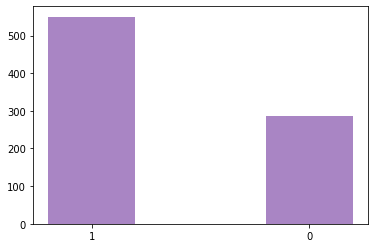

In [38]:
label = df['labels'].unique()
data = df['labels'].value_counts()
y_pos = np.arange(len(label))
plt.bar(y_pos, data, align='center', alpha=0.5, width= 0.4, color ='#540c8a')
plt.xticks(y_pos, label)
plt.show()

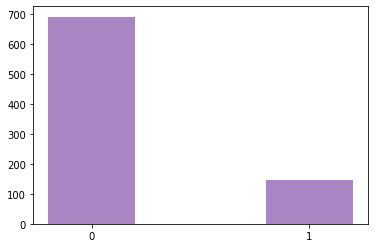

In [39]:
top = df['is_top500'].unique()
data = df['is_top500'].value_counts()
y_pos = np.arange(len(top))
plt.bar(y_pos, data, align='center', alpha=0.5, width= 0.4, color ='#540c8a')
plt.xticks(y_pos, top)
plt.show()

In [40]:
#Data cleaning
df= df.drop(['Unnamed: 0','state_code','zip_code','category_code','id','city','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at','state_code.1','object_id'], axis = 1)
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(axis=0,value=0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(axis=0,value=0)
features = df.columns
print(features)
print(df)

Index(['latitude', 'longitude', 'labels', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'last_date', 'age'],
      dtype='object')
      latitude   longitude  labels  ...    status  last_date   age
0    42.358880  -71.056820       1  ...  acquired 2013-12-31   7.0
1    37.238916 -121.973718       1  ...  acquired 2013-12-31  14.0
2    32.901049 -117.192656       1  ...  acquired 2013-12-31   5.0
3    37.320309 -122.050040       1  ...  acquired 2013-12-31  12.0
4    37.779281 -

# Statistiken

(2.5, -0.5)

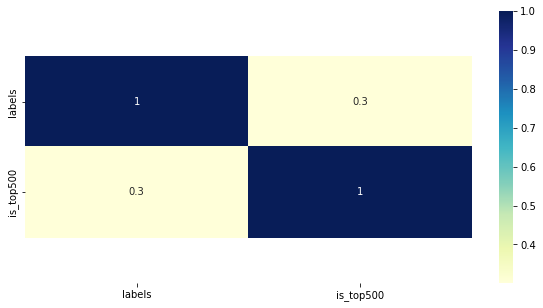

In [41]:
features = ['labels','is_top500']

plt.figure(figsize=(10,5))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

(31.5, -0.5)

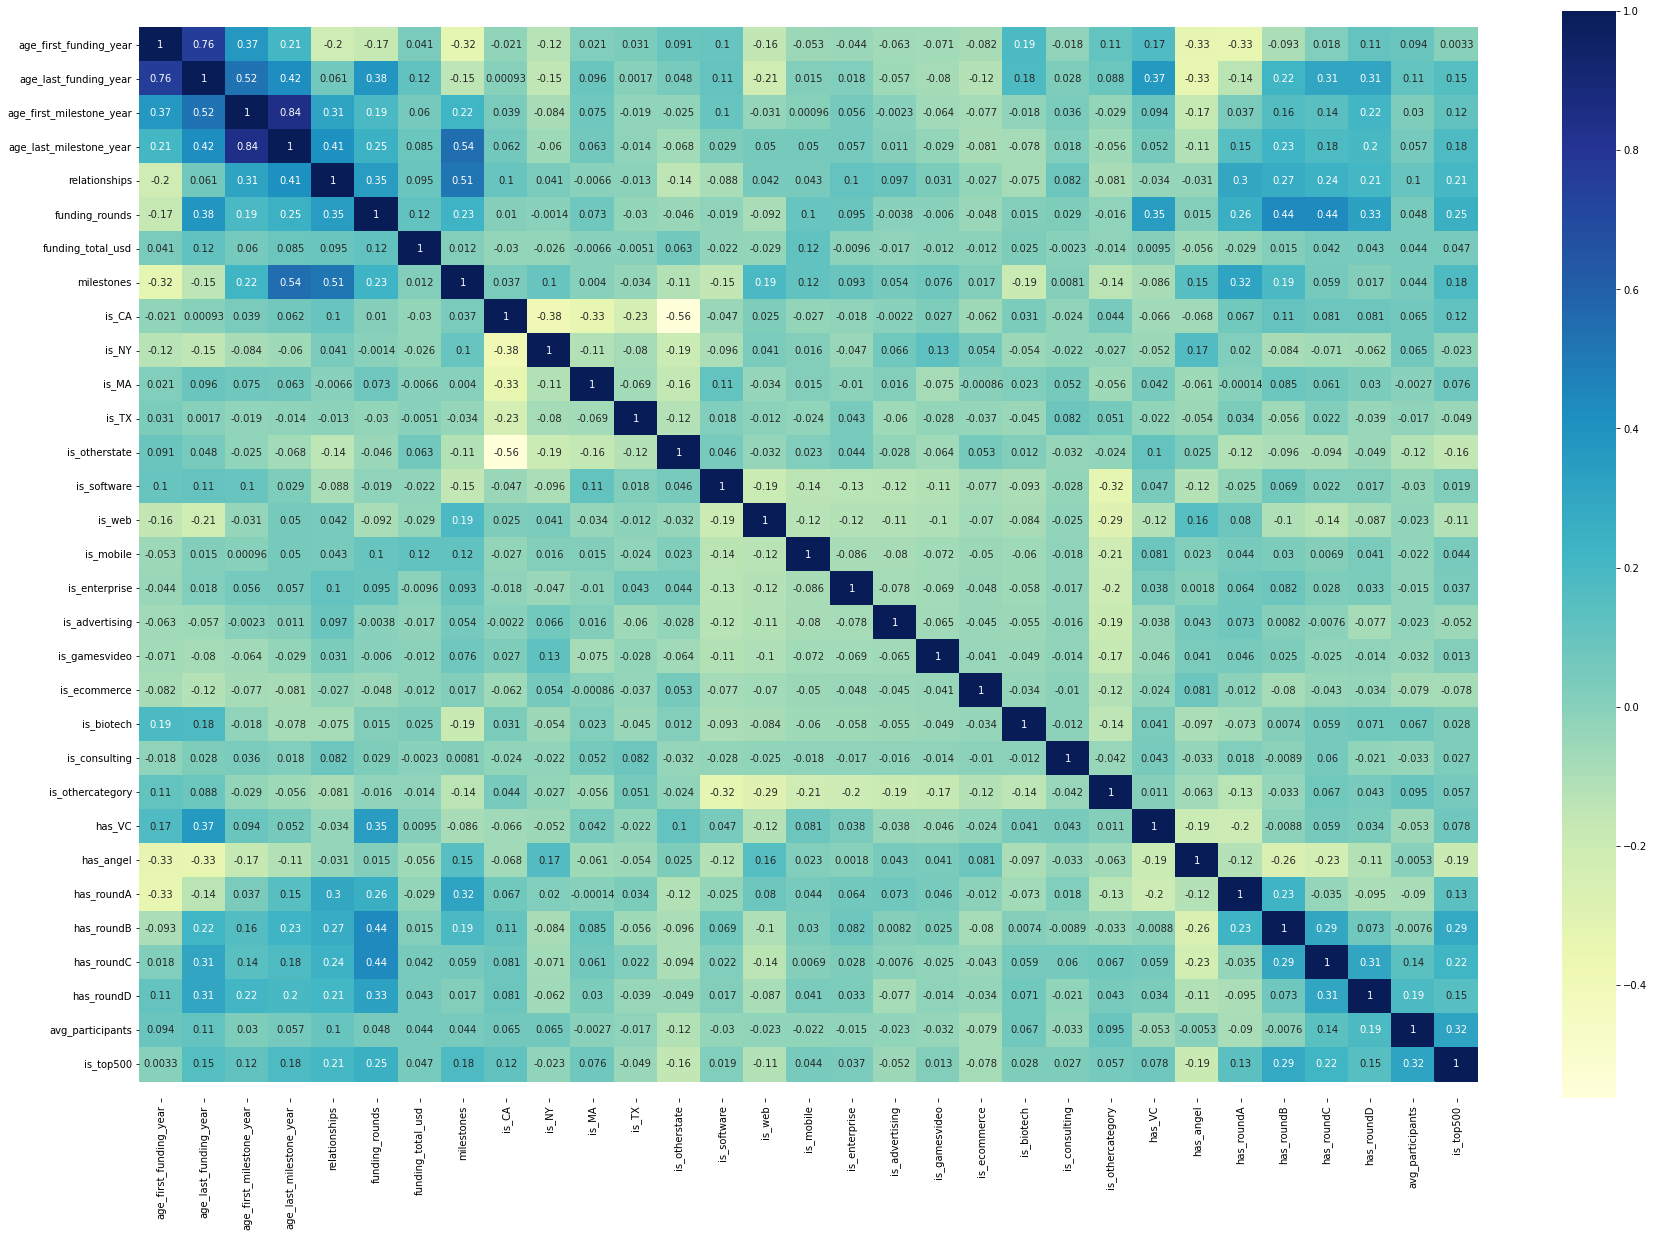

In [42]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

(4.5, -0.5)

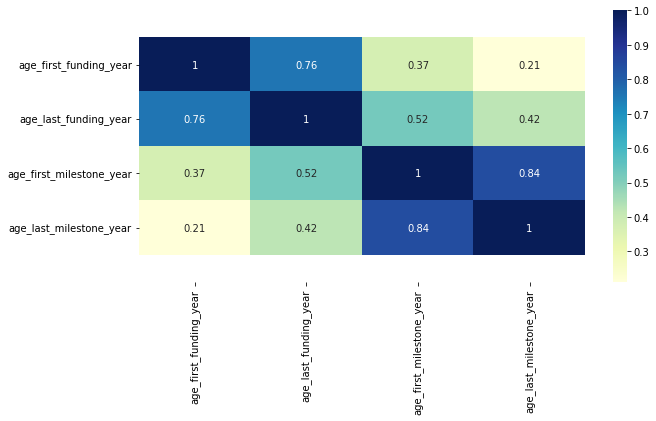

In [43]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']

plt.figure(figsize=(10,5))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

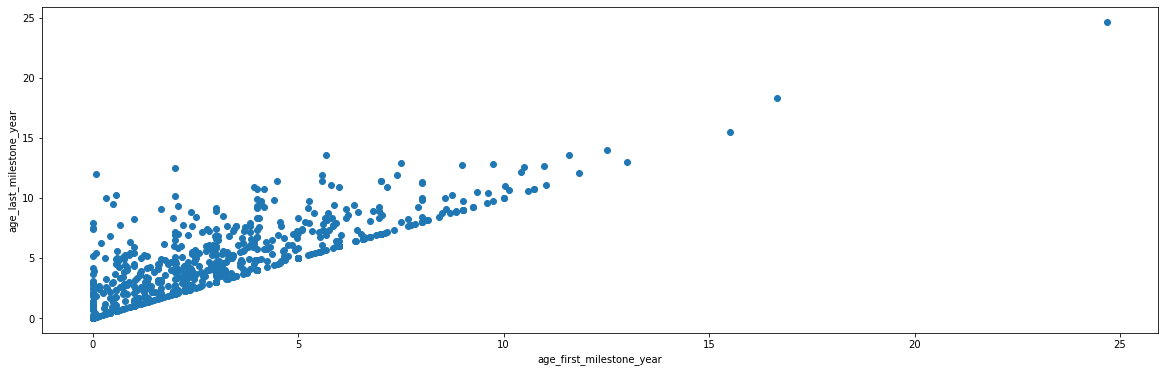

In [44]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(df['age_first_milestone_year'], df['age_last_milestone_year'])
ax.set_xlabel('age_first_milestone_year')
ax.set_ylabel('age_last_milestone_year')
plt.show()

# Modelling

In [45]:
from sklearn.model_selection import train_test_split
features = [x for x in features if x!='status']
print(features)

train,test = train_test_split(df, test_size = 0.25)
print(len(df))
print(len(train))
print(len(test))

['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year']
837
627
210


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

dt = RandomForestClassifier(min_samples_split=100, criterion='entropy')

x_train = train[features]
y_train = train['status']

x_test = test[features]
y_test = test['status']

dt = dt.fit(x_train, y_train)

y_pred_random = dt.predict(x_test)
print(y_pred_random)

score2 = accuracy_score(y_test, y_pred_random)*100
print("Accuracy rate with Random forest ", score2,"%")

['acquired' 'closed' 'acquired' 'acquired' 'acquired' 'closed' 'closed'
 'closed' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'closed'
 'closed' 'acquired' 'closed' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'closed' 'acquired' 'closed' 'acquired' 'acquired' 'acquired' 'closed'
 'acquired' 'closed' 'acquired' 'acquired' 'closed' 'closed' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'closed' 'closed' 'closed'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'closed'
 'acquired' 'closed' 'acquired' 'acquired' 'closed' 'acquired' 'acquired'
 'acquired' 'closed' 'closed' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'closed' 'acquired' 'closed' 'closed'
 'acquired' 'acquired' 'closed' 'closed' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'closed' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'close

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_random)
print(confusion_matrix)

[[118  20]
 [ 22  50]]


Text(69.0, 0.5, 'Truth')

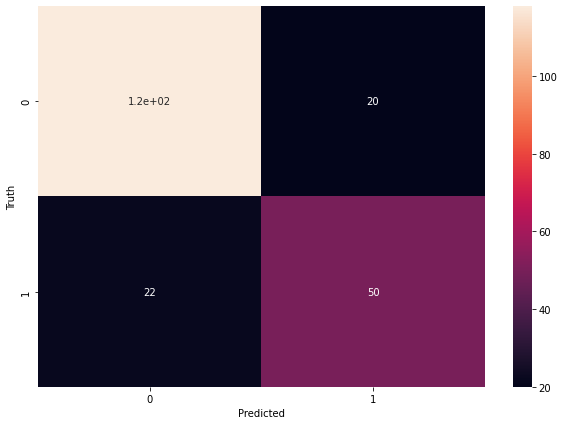

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
#Naive Byes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

dt = GaussianNB()

x_train = train[features]
y_train = train['status']

x_test = test[features]
y_test = test['status']

dt = dt.fit(x_train, y_train)

y_pred_N = dt.predict(x_test)
print(y_pred_N)

score3 = accuracy_score(y_test, y_pred_N)*100
print("Accuracy rate with Naive Byes ", score3,"%")

['acquired' 'closed' 'acquired' 'acquired' 'acquired' 'closed' 'acquired'
 'closed' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'closed' 'acquired'
 'acquired' 'acquired' 'acquired' 'closed' 'acquired' 'acquired' 'closed'
 'acquired' 'closed' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'closed' 'closed' 'closed' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'closed' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'closed' 'closed'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'closed' 'acquired' 'closed' 'closed' 'acquired' 'acquired'
 'acquired' 'closed' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquir

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_N)
print(confusion_matrix)

[[125  13]
 [ 40  32]]


Text(69.0, 0.5, 'Truth')

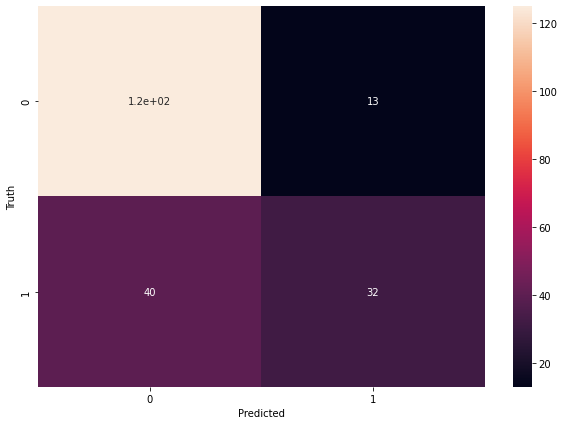

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
from sklearn.linear_model import LogisticRegression

dt = LogisticRegression(random_state=10)

x_train = train[features]
y_train = train['status']

x_test = test[features]
y_test = test['status']

dt = dt.fit(x_train, y_train)

y_pred_log = dt.predict(x_test)
print(y_pred_log)

score4 = accuracy_score(y_test, y_pred_log)*100
print("Accuracy rate with Logistic regression ", score4,"%")
from sklearn.linear_model import SGDClassifier

['acquired' 'closed' 'acquired' 'acquired' 'acquired' 'closed' 'acquired'
 'closed' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'closed' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'closed' 'acquired'
 'acquired' 'acquired' 'closed' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'closed' 'acquired' 'acquired'
 'acquired' 'closed' 'closed' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'closed'
 'acquired' 'acquired' 'closed' 'acquired' 'acquired' 'acquired' 'closed'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'closed' 'closed' 'acquired'
 'acquired' 'closed' 'closed' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'closed' 'acquired' 'acquired' 'acquired' 'closed' 'acquired'
 'acquired' 'acquired' 'acquired

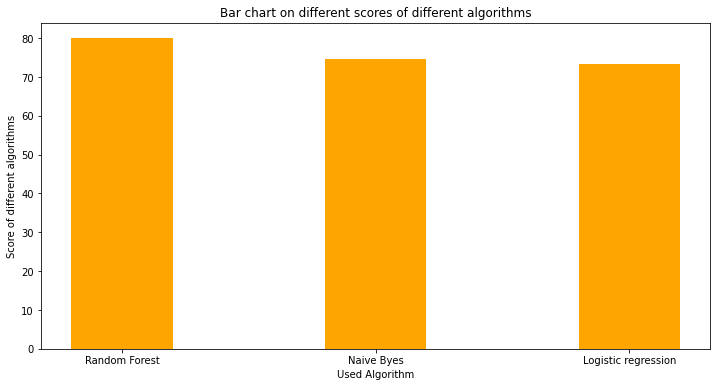

In [53]:
data = {'Random Forest':score2, 
    'Naive Byes':score3,'Logistic regression':score4 }
name = list(data.keys())
score = list(data.values())
  
fig = plt.figure(figsize = (12, 6))
 
plt.bar(name, score, color ='orange',
        width = 0.4)
 
plt.xlabel("Used Algorithm")
plt.ylabel("Score of different algorithms")
plt.title("Bar chart on different scores of different algorithms")
plt.show()